### This notebook documents initial experiments on how to accelerate the TS grid method using HealpixMap.

The following code was developed in July 2023 and organized in March 2024. If anyone in the future is confused or encounters errors when trying to merge the below code into the TSmap class, please contact ak119ka@gmail.com (Chien-You Jason Hunag) and perhaps I can explain my logic to you.

In [1]:
# Import useful packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

from histpy import HealpixAxis, Histogram

from threeML import DataList, Powerlaw, PointSource, Model, JointLikelihood

from mhealpy import HealpixMap

from cosipy import BinnedData
from cosipy.response import PointSourceResponse
from cosipy import COSILike

18:17:07 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=763327;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=211647;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=323048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=128371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

/Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=990433;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=22412;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=442274;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=314868;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=991103;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=880065;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=912590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=87861;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=964143;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=162221;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=70473;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=193152;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=226069;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=784824;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

/Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


18:17:07 INFO      Starting 3ML!                                                                     ]8;id=48584;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=826747;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=504067;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=29713;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=34540;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=247547;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=237328;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=509621;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=124278;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=594600;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=874;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=830563;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=409427;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=898328;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=41947;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=477511;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=296584;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=478796;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=503926;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=142125;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=824624;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=854513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=433242;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=58134;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=414213;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=756953;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=858699;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=147501;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Reference

To generate the binned source and background data, please refer to 'spectral_fit_cds_rot.ipynb'. For the source, 'crab_dataIO_config.yml' and 'GalacticScan.inc1.id1.crab2hr.extracted.tra.gz' are needed. For the background, 'bkg_dataIO_config.yml' and 'Cosmic_diffuse_2hr_unbinned_data.hdf5' are needed.

Moreover, 'spectral_fit_cds_rot.ipynb' also demonstrates how to use 'psr_miniDC_crab_2hr_gal.h5' and do the spectrum fitting.

All files mentioned above can be found in https://drive.google.com/drive/folders/1UdLfuLp9Fyk4dNussn1wt7WEOsTWrlQ6?usp=drive_link.

### Load source and background data

In [2]:
# Open binned source data
crab = BinnedData("crab_dataIO_config.yml")
crab.load_binned_data_from_hdf5('crab/Crab_2hr_binned_data.hdf5')

crab = crab.binned_data.project(['Em', 'Phi', 'PsiChi'])
crab.axes['PsiChi'] = HealpixAxis(nside=8, label='PsiChi')

In [3]:
# Open binned background data
bkg = BinnedData("bkg_dataIO_config.yml")
bkg.load_binned_data_from_hdf5('bkg/Cosmic_diffuse_2hr_binned_data.hdf5')

bkg = bkg.binned_data.project(['Em', 'Phi', 'PsiChi'])
bkg.axes['PsiChi'] = HealpixAxis(nside=8, label='PsiChi')

(<Mollview: >, <matplotlib.image.AxesImage at 0x16e54c1f0>)

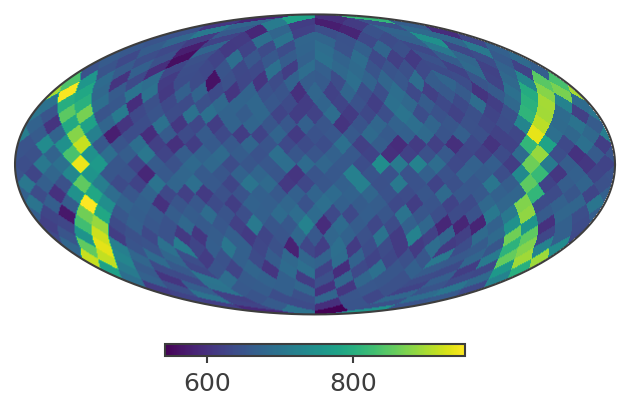

In [4]:
# Create binned data
data = crab + bkg

# Visualize binned data
data.slice[{'Em':3, 'Phi':4}].project('PsiChi').plot()

### Load point source response

In [5]:
# Open point source response
psr = Histogram.open("psr_miniDC_crab_2hr_gal.h5")

# Check point source response
print('psr label            :', psr.axes.labels)
print('psr NuLambda coordsys:', psr.axes['NuLambda'].coordsys)
print('psr PsiChi coordsys  :', psr.axes['PsiChi'].coordsys)
print('psr unit             :', psr.unit)

psr label            : ['NuLambda' 'Ei' 'Em' 'Phi' 'PsiChi' 'SigmaTau' 'Dist']
psr NuLambda coordsys: <Galactic Frame>
psr PsiChi coordsys  : <Galactic Frame>
psr unit             : cm2 s


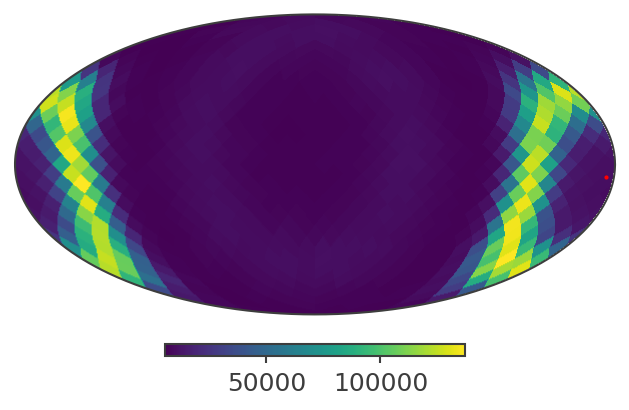

In [6]:
# Extract position of Crab 
coord_crab = SkyCoord.from_name('Crab').galactic
coord_crab_psr_pix = psr.axes['NuLambda'].ang2pix(coord_crab)

# Visualize point source response for position of Crab
CDS_cross_section = psr.slice[{'NuLambda':coord_crab_psr_pix, 'Em':2, 'Phi':4}].project('PsiChi')
ax, plot = CDS_cross_section.plot(ax_kw = {"coord":'G'})
ax.scatter(coord_crab.l.deg, coord_crab.b.deg, transform=ax.get_transform('world'), color='red', s=1)

### Spectral fit

In [7]:
# Create COSI 3ML plugin
cosi = COSILike("cosi",                
                psr = psr,             
                data = data,           
                bkg = bkg,             
                nuisance_param = None) 

In [8]:
# Define initial spectrum parameters
K = 0.00247 / u.cm / u.cm / u.s / u.keV
index = -2.
piv = 1000 * u.keV

# Create Powerlaw spectrum with spectrum parameters
spectrum = Powerlaw()
spectrum.K.value = K.value
spectrum.K.unit = K.unit
spectrum.index.value = index
spectrum.piv.value = piv.value
spectrum.piv.unit = piv.unit

# Create PointSource with position of Crab and Powerlaw spectrum
source = PointSource("source",                  
                     l = coord_crab.l.deg,          
                     b = coord_crab.b.deg,           
                     spectral_shape = spectrum)

# Create Model for COSI 3ML plugin
model = Model(source)
cosi.set_model(model)

In [9]:
# Fix index of Powerlaw spectrum
source.spectrum.main.Powerlaw.index.fix = True

# Check free and fixed fitting parameters in Model
model.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (1):
--------------------

                                   value min_value max_value            unit
source.spectrum.main.Powerlaw.K  0.00247       0.0    1000.0  keV-1 s-1 cm-2

Fixed parameters (4):
---------------------

                                          value min_value max_value unit
source.position.l                    184.555101       0.0     360.0  deg
source.position.b                     -5.787682     -90.0      90.0  deg
source.spectrum.main.Powerlaw.piv        1000.0      None      None  keV
source.spectrum.main.Powerlaw.index        -2.0     -10.0      10.0     

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [10]:
# Less verbose workaround
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [11]:
# Do JointLikelihood fitting
plugins = DataList(cosi) # If we had multiple instruments, we would do e.g. DataList(cosi, lat, hawc, ...)
like = JointLikelihood(model, plugins, verbose = False)
like.fit()

18:17:49 INFO      set the minimizer to minuit                                             ]8;id=178257;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=481718;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

18:17:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=345105;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=886787;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(3.846 +/- 0.008) x 10^-6,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,-9.204917e+08
total,-9.204917e+08


Values of statistical measures:

,statistical measures
AIC,-1.840983e+09
BIC,-1.840983e+09


(                                    value  negative_error  positive_error  \
 source.spectrum.main.Powerlaw.K  0.000004   -7.662291e-09    7.700203e-09   
 
                                         error             unit  
 source.spectrum.main.Powerlaw.K  7.681247e-09  1 / (keV s cm2)  ,
        -log(likelihood)
 cosi      -9.204917e+08
 total     -9.204917e+08)

### TS grid with HealpixMap

In [12]:
# Define initial global variables
used_nside = 1 # nside for zero-order HealpixMap and further iteration
stop_nside = 8 # nside for final HealpixMap

top_number = 8 # the top few pixels of log(likelihood) need to be further split

In [13]:
# Create empty zero-order HealpixMap
m = HealpixMap(nside=used_nside, scheme='nested', density=True, coordsys='G')

In [14]:
def fill_empty_value(input_map, empty_arg_list):
    
    # Loop all empty pixels
    for pix_idx, pix in enumerate(empty_arg_list):
        
        # Print progress
        print(f"\rRun pix = {1+pix_idx:d}/{len(empty_arg_list)}")
        
        # Transfer pix to skycoord in input_map
        skycoord = input_map.pix2skycoord(pix)
        
        # Reset source.position
        source.position.l = skycoord.l.deg
        source.position.b = skycoord.b.deg
        
        # Do the Fitting
        like.fit(quiet=True)
        
        # Fill log(likelihood) in corresponding pix
        input_map[pix] = -like._current_minimum
        
    return

In [15]:
%%time

# Fill up zero-order HealpixMap
fill_empty_value(m, range(m.npix))

Run pix = 1/12
Change source position


18:17:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=362698;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=940095;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 2/12
Change source position


18:17:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=174952;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=83754;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 3/12
Change source position


18:17:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=978885;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=902284;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 4/12
Change source position


18:17:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=164549;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=515947;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 5/12
Change source position


18:17:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=742422;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=378338;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 6/12
Change source position


18:18:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=216869;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=244601;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 7/12
Change source position


18:18:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=284555;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=261585;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 8/12
Change source position


18:18:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=81388;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=575644;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 9/12
Change source position


18:18:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=304958;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=419930;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 10/12
Change source position


18:18:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=631038;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=36254;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 11/12
Change source position


18:18:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=345613;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=208435;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 12/12
Change source position


18:18:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=119945;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=386236;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

CPU times: user 16.2 s, sys: 950 ms, total: 17.1 s
Wall time: 17.3 s


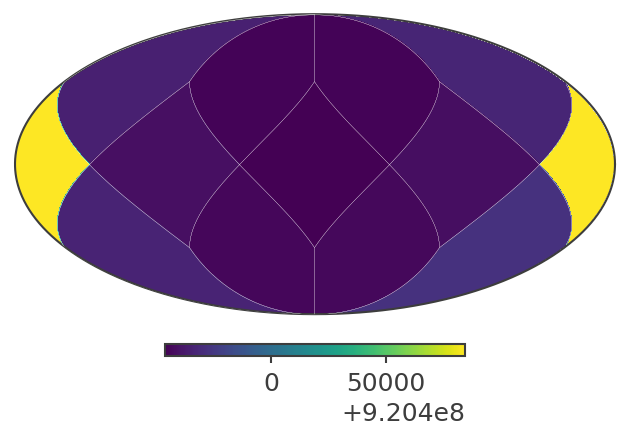

In [16]:
# Visualize zero-order HealpixMap
m_plot, m_ax = m.plot(ax_kw = {"coord":'G'})
m.plot_grid(plt.gca(), linewidth = .1, color = 'white');

In [17]:
def split_map(old_map, threshold_condition):
    
    # Find log(likelihood) threshold for further possible split
    if threshold_condition > 0: # Rank case
        
        # Make sure top_number is an ceiling integer
        top_number = int(np.ceil(threshold_condition))
        
        # Extract top_number_arg_array
        top_number_arg_array = np.argpartition(old_map, -top_number)[-top_number:]

        # Define threshold
        threshold = min(old_map[top_number_arg_array])
    
    else: # Ratio case

        # Define threshold
        threshold = min(old_map) + ((max(old_map) - min(old_map)) * threshold_condition)
    
    # Extract may_split_arg_array
    may_split_arg_array = np.argwhere(old_map >= threshold)
    
    # Calculate min nside from min uniq
    min_need_split_uniq = min(old_map.uniq[may_split_arg_array])
    min_need_split_k = np.floor(np.log2(min_need_split_uniq/4)/2)
    min_need_split_nside = int(np.sqrt(4**min_need_split_k))
    
    # Calculate next used_nside based on k of min uniq
    used_nside = int(np.sqrt(4**(min_need_split_k+1)))
    
    # Calculate max nside from max uniq
    max_need_split_uniq = max(old_map.uniq[may_split_arg_array])
    max_need_split_k = np.floor(np.log2(max_need_split_uniq/4)/2)
    max_need_split_nside = int(np.sqrt(4**max_need_split_k))
    
    # Decide wait_flag by comparing min and max nside just for checking
    if max_need_split_nside != min_need_split_nside:
        wait_split_flag = True
    else:
        wait_split_flag = False
    
    # Create list for return
    need_split_pixel_list = []
    
    # Loop all uniq which may be split
    for may_split_uniq in old_map.uniq[may_split_arg_array]:
        
        # Calculate old k, p & nside
        may_split_k = np.floor(np.log2(may_split_uniq/4)/2)
        may_split_p = may_split_uniq - 4**(may_split_k+1)
        may_split_nside = int(np.sqrt(4**may_split_k))
        
        # Only split min nside case
        if may_split_nside == min_need_split_nside:
            
            # Calculate new p (only min is enough)
            each_min_need_split_p = int(4 * may_split_p)

            # Save into return list
            need_split_pixel_list.append(each_min_need_split_p)
    
    return used_nside, wait_split_flag, need_split_pixel_list

In [18]:
def fill_unchange_value(old_map, new_map):
    
    # Find splitted uniq in old_map
    uniq_only_in_old = np.setdiff1d(old_map.uniq, new_map.uniq)
    
    # Loop all old_map_uniq
    for old_map_uniq_idx, old_map_uniq in enumerate(old_map.uniq):
        
        # Copy value to new_map for un-splitted uniq
        if old_map_uniq not in uniq_only_in_old:
            new_map_uniq_arg = np.argwhere(new_map.uniq==old_map_uniq)
            new_map[new_map_uniq_arg] = old_map[old_map_uniq_idx]
    
    # Create empty list to return
    uniq_arg_only_in_new_list = []
    
    # Find splitted uniq in new_map
    uniq_only_in_new = np.setdiff1d(new_map.uniq, old_map.uniq)
    
    # Loop all new_map_uniq
    for new_map_idx, new_map_uniq in enumerate(new_map.uniq):
        
        # Transfer to arg and save
        if new_map_uniq in uniq_only_in_new:
            uniq_arg_only_in_new_list.append(new_map_idx)
    
    return uniq_arg_only_in_new_list

In [19]:
%%time

# Stop when used_nside > stop_nside
while True:
    
    # Get used_nside & need_split_pixel_list
    used_nside, _, need_split_pixel_list = split_map(m, top_number) # wait_split_flag is useless, just for checking
    
    if used_nside > stop_nside:
        break
    
    # Print progress
    print(f"\rRun nside = {used_nside:d}/{stop_nside}")
    
    # Split m base on used_nside & need_split_pixel_list
    m_split_temp = m.moc_from_pixels(used_nside, need_split_pixel_list, nest=True, density=True, coordsys='galactic')
    
    # Take the union of m and m_split_temp
    m_split = m * m_split_temp
    
    # Fill the original value in the old pixel
    m_split_empty_arg_list = fill_unchange_value(m, m_split)
    
    # Fill the new value in the new pixel
    fill_empty_value(m_split, m_split_empty_arg_list)
    
    # Update m
    m = m_split

Run nside = 2/8
Run pix = 1/32
Change source position


18:18:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=789748;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=716867;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 2/32
Change source position


18:18:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=672613;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=111339;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 3/32
Change source position


18:18:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=559866;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=984274;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 4/32
Change source position


18:18:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=537721;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=130560;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 5/32
Change source position


18:18:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=936115;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=802662;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 6/32
Change source position


18:18:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=145626;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=36236;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 7/32
Change source position


18:18:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=133761;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=528375;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 8/32
Change source position


18:18:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=290322;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=713722;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 9/32
Change source position


18:18:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=704878;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=381464;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 10/32
Change source position


18:18:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=313070;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=427695;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 11/32
Change source position


18:18:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=567766;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=9188;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 12/32
Change source position


18:18:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=698974;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=806797;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 13/32
Change source position


18:18:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=54507;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=997260;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 14/32
Change source position


18:18:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=374560;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=631921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 15/32
Change source position


18:18:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=487777;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=512551;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 16/32
Change source position


18:18:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=384583;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=935674;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 17/32
Change source position


18:18:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=340580;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=191284;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 18/32
Change source position


18:18:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=840731;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=194323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 19/32
Change source position


18:18:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=77537;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=199881;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 20/32
Change source position


18:18:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=228271;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=855485;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 21/32
Change source position


18:18:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=255325;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=898832;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 22/32
Change source position


18:18:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=666121;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=117230;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 23/32
Change source position


18:18:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=527932;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=934298;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 24/32
Change source position


18:18:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=926940;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=260433;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 25/32
Change source position


18:18:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=145507;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=237634;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 26/32
Change source position


18:18:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=979220;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=8227;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 27/32
Change source position


18:18:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=418449;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=438081;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 28/32
Change source position


18:18:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=956803;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=580347;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 29/32
Change source position


18:18:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=342268;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=185545;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 30/32
Change source position


18:18:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=744124;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=452235;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 31/32
Change source position


18:18:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=567209;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=193460;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 32/32
Change source position


18:18:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=872711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=747661;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run nside = 4/8
Run pix = 1/32
Change source position


18:18:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=858999;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=487464;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 2/32
Change source position


18:18:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=27061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=971239;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 3/32
Change source position


18:18:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=601552;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=580369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 4/32
Change source position


18:18:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=138882;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=525509;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 5/32
Change source position


18:18:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=141440;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=827743;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 6/32
Change source position


18:18:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=10849;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=632631;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 7/32
Change source position


18:18:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=982510;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=87196;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 8/32
Change source position


18:19:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=457053;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=422438;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 9/32
Change source position


18:19:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=860445;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=57114;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 10/32
Change source position


18:19:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=510317;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=346720;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 11/32
Change source position


18:19:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=199156;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=877820;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 12/32
Change source position


18:19:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=546344;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=295701;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 13/32
Change source position


18:19:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=40127;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 14/32
Change source position


18:19:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=363722;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=269126;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 15/32
Change source position


18:19:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=120845;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=590326;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 16/32
Change source position


18:19:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=891427;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=799541;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 17/32
Change source position


18:19:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=348381;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=779382;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 18/32
Change source position


18:19:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=303273;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=764442;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 19/32
Change source position


18:19:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=905004;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=889482;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 20/32
Change source position


18:19:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=963186;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=397636;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 21/32
Change source position


18:19:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=940984;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=756824;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 22/32
Change source position


18:19:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=616065;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=134471;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 23/32
Change source position


18:19:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=327076;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=85373;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 24/32
Change source position


18:19:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=6983;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=575850;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 25/32
Change source position


18:19:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=966877;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=458792;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 26/32
Change source position


18:19:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=901764;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=404930;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 27/32
Change source position


18:19:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=591317;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=841902;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 28/32
Change source position


18:19:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=178521;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=567402;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 29/32
Change source position


18:19:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=283082;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=134291;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 30/32
Change source position


18:19:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=267329;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=94291;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 31/32
Change source position


18:19:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=127537;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=491624;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 32/32
Change source position


18:19:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=397441;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=573455;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run nside = 8/8
Run pix = 1/32
Change source position


18:19:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=122609;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=910886;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 2/32
Change source position


18:19:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=778429;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=93357;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 3/32
Change source position


18:19:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=25740;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=806660;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 4/32
Change source position


18:19:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=279475;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=396333;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 5/32
Change source position


18:19:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=283841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=986982;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 6/32
Change source position


18:19:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=84864;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=424059;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 7/32
Change source position


18:19:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=641935;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=959493;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 8/32
Change source position


18:19:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=449615;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=33265;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 9/32
Change source position


18:19:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=260670;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=484606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 10/32
Change source position


18:19:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=978550;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=63909;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 11/32
Change source position


18:19:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=879576;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=241737;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 12/32
Change source position


18:19:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=642924;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=653735;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 13/32
Change source position


18:19:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=376655;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=271071;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 14/32
Change source position


18:19:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=751902;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=422210;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 15/32
Change source position


18:19:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=596691;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=752625;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 16/32
Change source position


18:19:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=876301;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=996641;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 17/32
Change source position


18:19:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=255942;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=750860;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 18/32
Change source position


18:19:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=887419;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=18493;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 19/32
Change source position


18:19:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=944802;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=214585;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 20/32
Change source position


18:19:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=311005;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=94987;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 21/32
Change source position


18:19:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=878006;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=691372;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 22/32
Change source position


18:19:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=565795;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=546673;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 23/32
Change source position


18:19:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=269065;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=854463;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 24/32
Change source position


18:19:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=453293;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=565585;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 25/32
Change source position


18:20:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=898677;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=161928;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 26/32
Change source position


18:20:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=820007;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=837042;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 27/32
Change source position


18:20:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=279548;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=804717;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 28/32
Change source position


18:20:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=346475;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=527181;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 29/32
Change source position


18:20:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=798311;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=725641;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 30/32
Change source position


18:20:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=506956;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=93694;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 31/32
Change source position


18:20:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=361528;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=955433;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Run pix = 32/32
Change source position


18:20:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=193477;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=129860;file:///Users/jasonpbu/miniconda3/envs/env_cosipy_3_miniCD2/lib/python3.10/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

CPU times: user 1min 56s, sys: 3 s, total: 1min 59s
Wall time: 1min 59s


In [20]:
# Calculate log_like0
spectrum.K.value = 1e-10
log_like0 = cosi.get_log_like()

In [21]:
# Calculate TS
ts = 2*(m - log_like0)

In [22]:
# Report best fit result
print("Crab position: ")
print(f"    galactic longitude (l) = {coord_crab.l.deg}")
print(f"    galactic latitude  (b) = {coord_crab.b.deg}")
print("--------------------------------------------------")
best_fit_l = ts.pix2skycoord(np.argmax(ts)).l.deg
best_fit_b = ts.pix2skycoord(np.argmax(ts)).b.deg
print("Best fit position: ")
print(f"    galactic longitude (l) = {best_fit_l}")
print(f"    galactic latitude  (b) = {best_fit_b}")
print(f"Expected significance: {stats.norm.isf(stats.chi2.sf(max(ts), df = 2)):.1f} sigma")

Crab position: 
    galactic longitude (l) = 184.5551014904497
    galactic latitude  (b) = -5.78768203451836
--------------------------------------------------
Best fit position: 
    galactic longitude (l) = 185.625
    galactic latitude  (b) = -9.594068226860458
Expected significance: inf sigma


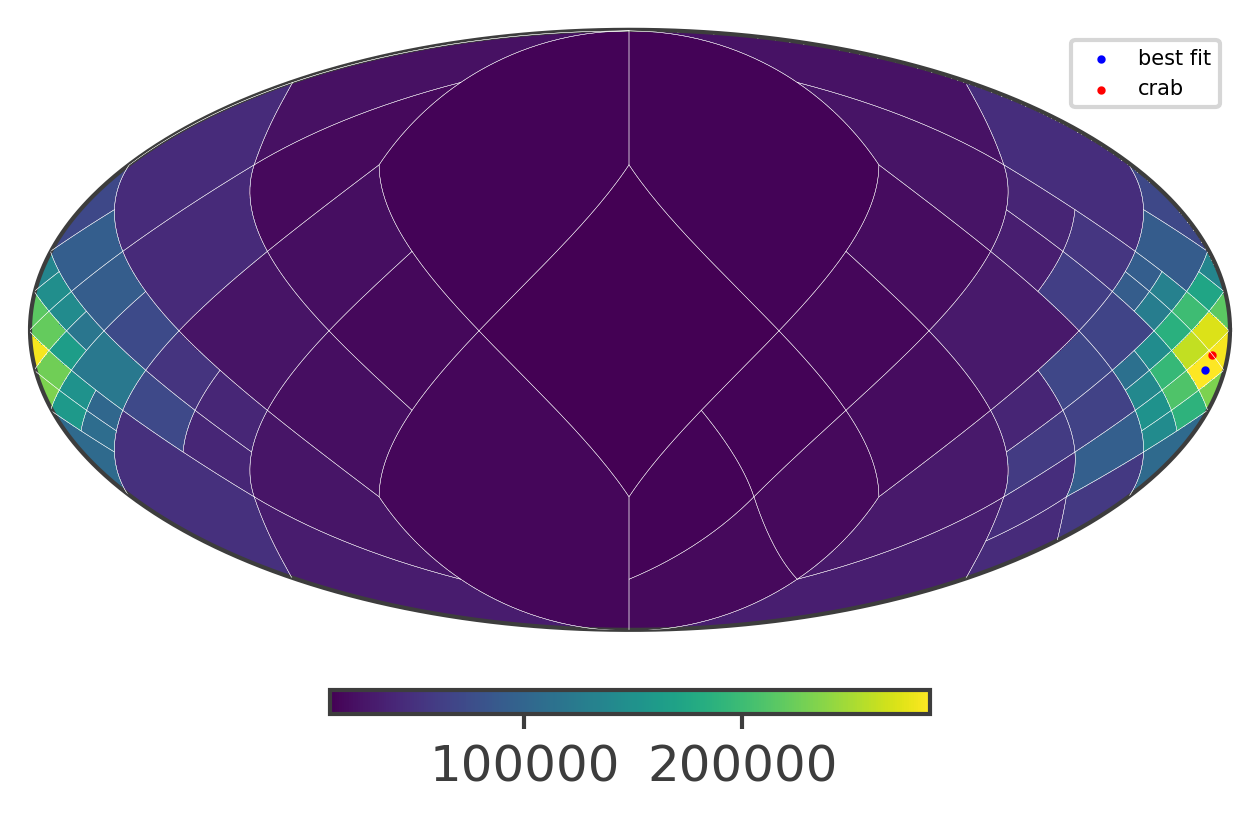

In [23]:
# Visualize TS map
ts_plot, ts_ax = ts.plot(ax_kw = {"coord":'G'})
ts_fig = plt.gcf()

ts_fig.set_dpi(300)

ts.plot_grid(ts_ax, linewidth = .1, color = 'white')

ts_ax.scatter(best_fit_l, best_fit_b, transform=ts_ax.get_transform('world'), color='blue', s=1, label='best fit')
ts_ax.scatter(coord_crab.l.deg, coord_crab.b.deg, transform=ts_ax.get_transform('world'), color='red', s=1, label='crab')
ts_ax.legend(loc='upper right', fontsize=5)